This assignment concerns the central share market of a small country is facing a problem. An analyst named William is suspected that one specific share trader named Elizabeth is manipulating/hacking the share trading software to make share trades in unusual ways. The only data available to William is about the hourly prices of shares traded. No other information is available to William. The only known indicator of any manipulated distortion (in the share market) is the presence of extreme outliers of share prices that are substantially distant from the share prices of that specific day.

William has arranged a meeting with the presidential body of the share market. In this meeting, William wants to show that something unusual is happening. If he can show anything suspicious, then more investigations will be performed and more data will be provided to him. William is asking for your help in effectively visualizing this data through a sensible graphic.

Hourly benchmark share prices for one week are provided. Elizabeth did substantial trading on 14th and 18th April only. She was practically inactive on other days.

Can you suggest any suitable graphics that helps visualize any notable oddities or suspicious peculiarities in this data?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Date': ['13th April', '14th April', '15th April', '16th April', '17th April', '18th April', '19th April', '20th April'],
    '9:30': [20.38, 18.51, 22.87, 23.71, 25.37, 20.87, 19.0, 22.17],
    '10:30': [20.82, 19.52, 25.99, 24.03, 22.06, 22.99, 23.79, 24.99],
    '11:30': [22.66, 21.01, 24.25, 18.52, 23.44, 21.25, 24.53, 23.25],
    '12:30': [22.17, 20.0, 25.71, 22.14, 21.63, 24.71, 23.95, 22.71],
    '13:30': [20.69, 19.04, 21.91, 20.63, 23.95, 23.91, 24.41, 24.91],
    '14:30': [22.19, 19.02, 21.19, 19.17, 24.78, 23.19, 22.74, 23.19],
    '15:30': [22.73, 25.48, 23.51, 25.35, 24.06, 21.51, 22.37, 22.51]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt DataFrame for visualizations
df_melted = pd.melt(df, id_vars='Date', var_name='Hour', value_name='Share Price')

# Add a column to mark active and inactive days
df_melted['Activity'] = df_melted['Date'].isin(['14th April', '18th April']).map({True: 'Active', False: 'Inactive'})

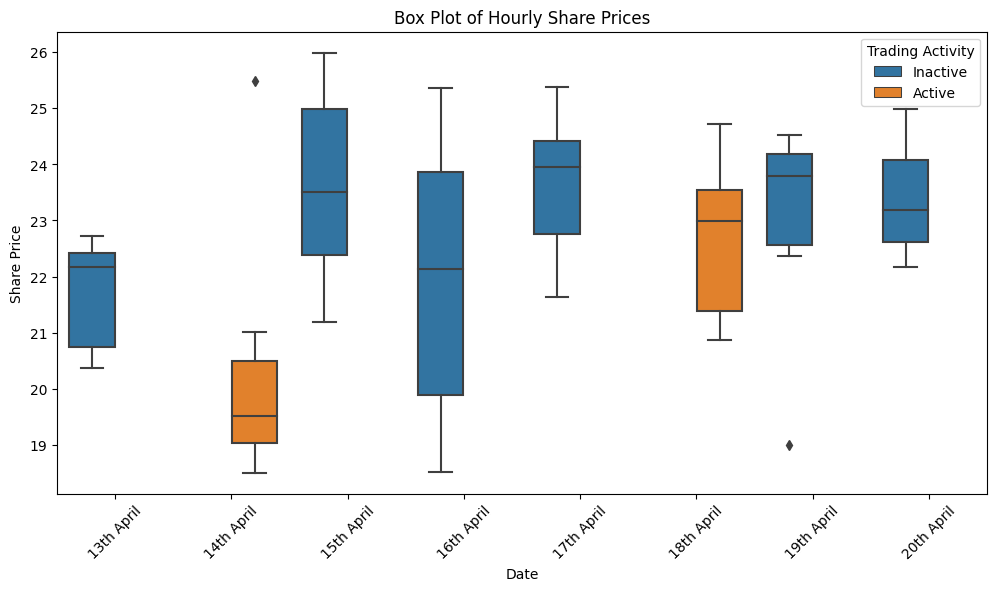

In [25]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Date', y='Share Price', hue='Activity')
plt.title('Box Plot of Hourly Share Prices')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.xticks(rotation=45)
plt.legend(title='Trading Activity')
plt.show()

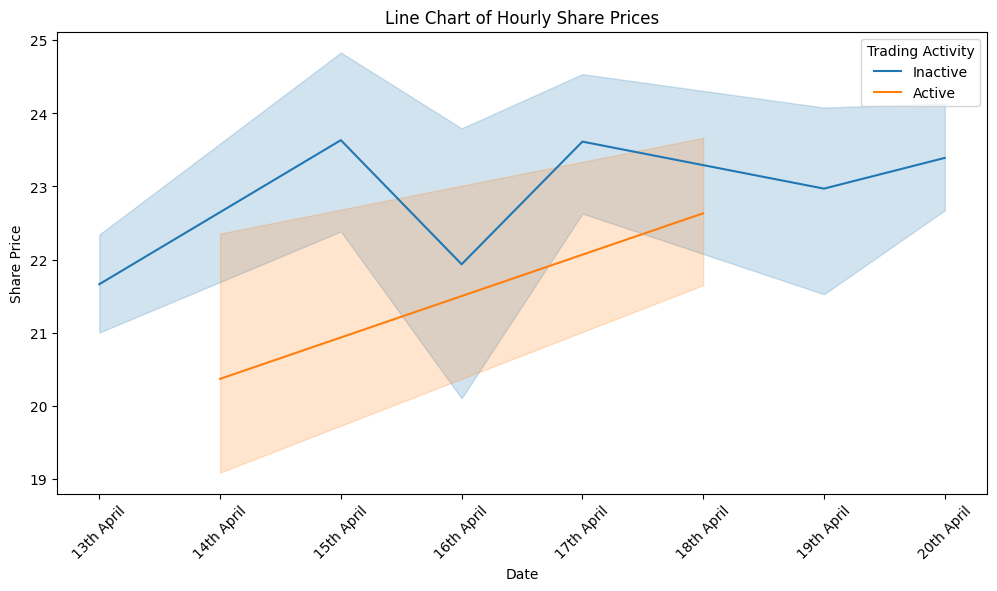

In [26]:
# Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Date', y='Share Price', hue='Activity')
plt.title('Line Chart of Hourly Share Prices')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.xticks(rotation=45)
plt.legend(title='Trading Activity')
plt.show()

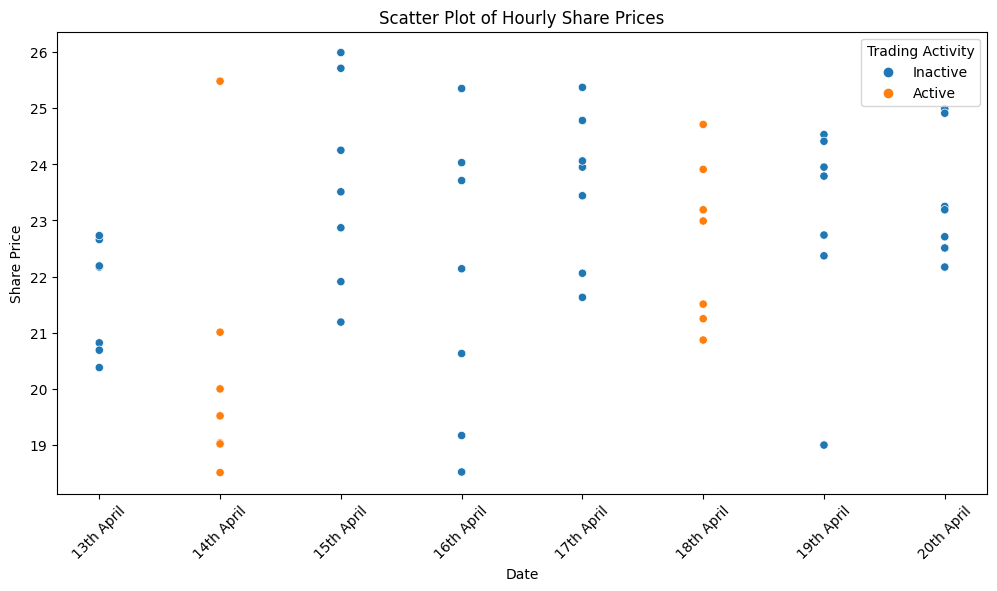

In [27]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_melted, x='Date', y='Share Price', hue='Activity')
plt.title('Scatter Plot of Hourly Share Prices')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.xticks(rotation=45)
plt.legend(title='Trading Activity')
plt.show()

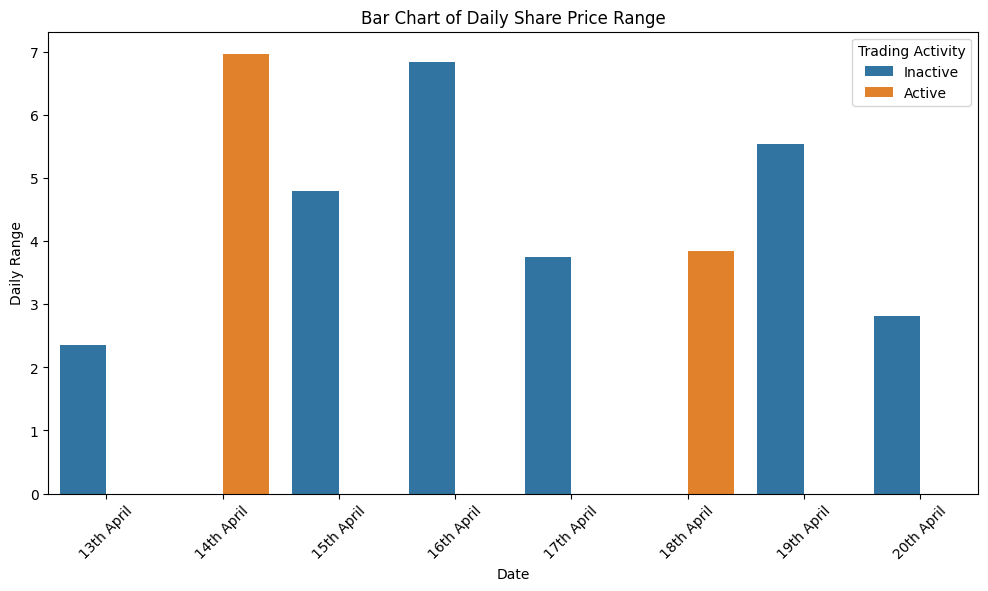

In [28]:
# Bar Chart
df_melted['Daily Range'] = df_melted.groupby('Date')['Share Price'].transform(lambda x: x.max() - x.min())
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Daily Range', hue='Activity', data=df_melted.drop_duplicates(subset=['Date']))
plt.title('Bar Chart of Daily Share Price Range')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.xticks(rotation=45)
plt.legend(title='Trading Activity')
plt.show()